In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import os

original_dir = os.getcwd()
os.chdir('..')

from decision_plotting import DecisionRegionPlotter
os.chdir(original_dir)

In [2]:
star_data = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Stars.csv')
print(star_data.info())
print(star_data.head())
print(star_data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB
None
   Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute magnitude (Mv)  \
0             3068           0.002400         0.1700                    16.12   
1             3042           0.000500         0.1542                    16.60   
2             2600           0.000300        

In [3]:
print(star_data['Star category'].unique())
print(star_data['Star color'].unique())

print(star_data['Spectral Class'].value_counts())

['Brown Dwarf' 'Red Dwarf' 'White Dwarf' 'Main Sequence' 'Supergiant'
 'Hypergiant']
['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']
Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64


In [4]:
star_data = star_data.loc[star_data['Spectral Class'] != 'G']
print(star_data['Spectral Class'].value_counts())

Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
Name: count, dtype: int64


In [5]:
y = star_data['Spectral Class']
X = star_data.select_dtypes(include='number')

categorical_features = ['Star category', 'Star color']

ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity
encoded_array = ohe.fit_transform(star_data[categorical_features])

# Convert back to DataFrame with proper column names
feature_names = ohe.get_feature_names_out(categorical_features)
encoded_features = pd.DataFrame(encoded_array, columns=feature_names, index=star_data.index)

# Combine with numerical features
X = pd.concat([star_data.select_dtypes(include='number'), encoded_features], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [6]:
n_estimators = 100
criterion = 'gini'
rfc = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, n_jobs=-1, max_features='sqrt', random_state=42).fit(X_train, y_train)
prediction_acc_rfc = np.mean(rfc.predict(X_test) == y_test)
print(f"Prediction accuracy on the Random Forest with {n_estimators} estimators and {criterion} criterion is {prediction_acc_rfc*100:.2f}%.")

Prediction accuracy on the Random Forest with 100 estimators and gini criterion is 95.00%.


Mesh too large (175,150,064,232 points). Adjusting resolution to 1019.304
Data ranges: X=[-84942.00, 934362.00], Y=[-84941.99, 86890.50]


c:\Users\sadit\miniconda3\envs\dataexercises\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Primary Storage\Programming\Machine_Learning_Sebastian_Raschka\Classifiers\decision_plotting.py:294: UserWarning: Prediction failed: could not convert string to float: 'F'
  warnings.warn(f"Prediction failed: {e}")


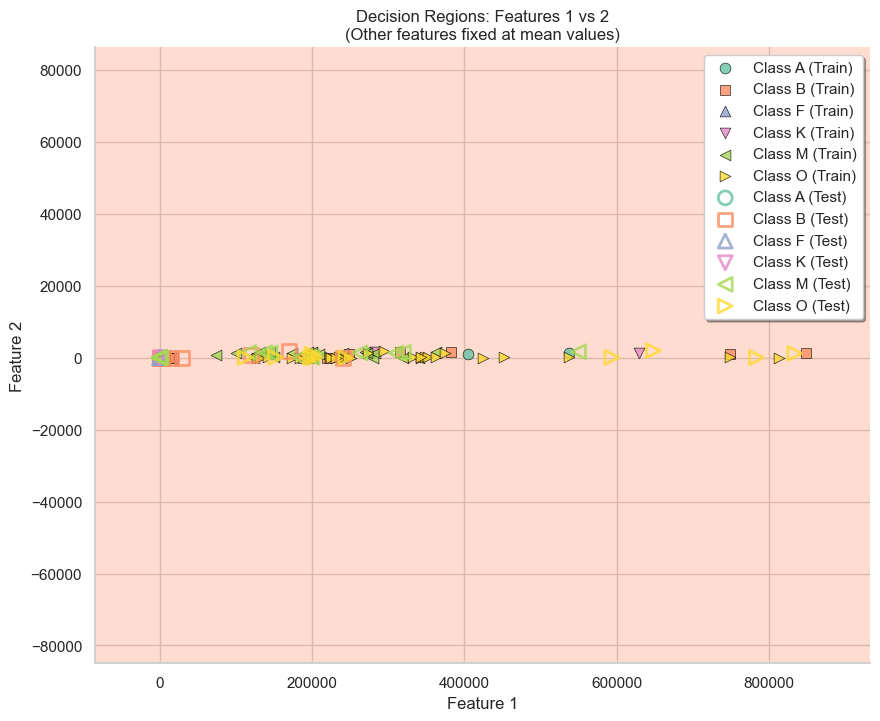

In [7]:
drp = DecisionRegionPlotter()
drp.plot_decision_regions(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, classifier=rfc, fast_mode=True, max_samples=500, resolution=1.0, feature_indices=(1,2))
plt.show()

[[ 4  1  0  0  0  0]
 [ 0 11  0  0  0  1]
 [ 0  0  4  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0 28  0]
 [ 0  1  0  0  0  9]]


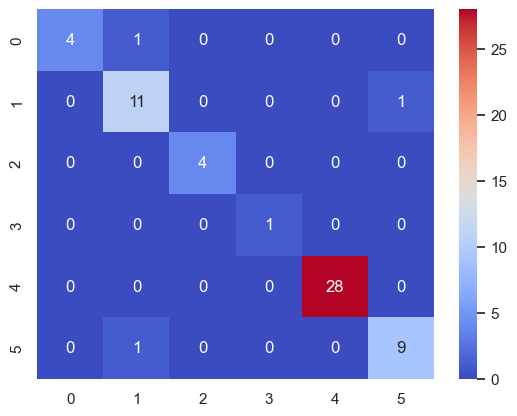

In [13]:
print(confusion_matrix(y_test, rfc.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), cmap='coolwarm', annot=True, xticklabels=True, yticklabels=True)
plt.show()

In [15]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           A       1.00      0.80      0.89         5
           B       0.85      0.92      0.88        12
           F       1.00      1.00      1.00         4
           K       1.00      1.00      1.00         1
           M       1.00      1.00      1.00        28
           O       0.90      0.90      0.90        10

    accuracy                           0.95        60
   macro avg       0.96      0.94      0.94        60
weighted avg       0.95      0.95      0.95        60

